# 1. 평균 이동(Mean Shift)
- K-means Clustering의 단점
    - K the number of Clusters)를 사전에 정의해야 함
    - 초기 중심점(Centroid) 설정에 따라 수렴 여부가 크게 영향을 받음
- Mean Shift Clustering
    - KDE(Kernel Density Estimation)을 이용하여 data point들이 density가 큰 쪽으로 이동하면서 군집화
    - 자동으로 군집 개수(number of clusters)를 결정
    - But, 시간이 오래 걸림


## 1_1. Mean Shift의 main Idea: KDE
![image](https://user-images.githubusercontent.com/70187490/132974130-2bd9ef36-8992-45f4-bffd-614f19bfb3a3.png)


- 확률밀도함수를 구하기 위해 일반적으로 히스토그램을 사용한다
- 하지만 히스토그램 밀도추정의 문제점은
    - Bin의 경계에서 불연속성이 나타나며
    - Bin의 크기에 따라 히스토그램이 달라진다.
- 이러한 문제점을 해결하기 위해서 커널 밀도 추정(KDE: Kernel Density Estimation)이 등장

## 1_2. KDE(Kernel Density Estimation)
- 커널함수를 통해 어떤 변수의 PDF(Probability Density Function; 확률밀도함수)를 추정하는 방식
- 히스토그램은 Bin을 통해 165 $\leqslant$ x $<$170 의 등급으로 밀도수를 정하기 때문에 불연속성이 발생(어느곳은 5개, 어느곳은 0개)
- 커널함수는 이를 부드럽게 표시하자라는 concept 
- 예측값은 나올 확률이 연속적으로 분포가 되어있다고 가정
    - ex. 170.1cm의 예측값이 170의 등급에 속할 확률은 0.35%, 169의 등급에 확률은 0.24%
- 이를 정규분포화시켜 확인해보자라는 것이 KDE
![image](https://user-images.githubusercontent.com/70187490/132972886-2a06d3ed-0aa5-4bbb-a5ae-c98f1c701bed.png)

$$f(x) = \frac{1}{nh}\sum^n_{i=1}K \left( \frac{x-x_i}{h} \right)$$
- $x_i$: 각각의 data point
- $h$: 얼마나 관대하게 봐줄지를 설정하는 폭 (bandwidth, 대역폭) 

- 예측값($x$)과 data point의 차를 bandwidth로 나눈 후 위에서 구한 커널함수를 이용해 각각의 거리를 구하고
- 이를 다 더하여 평균을 내어 그래프를 완성시킨 것이 아래의 그래프
![image](https://user-images.githubusercontent.com/70187490/132973123-e427340b-f211-4b4e-9718-59d8b98c2f83.png)

- bandwidth의 차이에 따른 그래프의 변화 (첫번째 그림은 $h=2$인 히스토그램)

![image](https://user-images.githubusercontent.com/70187490/132973356-7d470ca4-6a6e-4764-92a6-b5e0746478ef.png)



- Optimal Bandwidth: $h= \left( \frac{4 \sigma^5}{3n} \right)^{\frac{1}{5}} \approx 1.06 \sigma n^{-1/5}$
    - 단, $n$은 샘플 데이터의 수
    - $\sigma$는 샘플 데이터의 표준편차
    - 라고 주장하는 학자도 있다.
## 1_3. Bandwidth(h)에 따른 KDE의 변화
![image](https://user-images.githubusercontent.com/70187490/132973458-3d969487-b62d-4460-a80f-dde20a44c952.png)

- 1번 그림은 overfitting
- 4번 그림은 underfitting
- 적절한 h를 찾는 것이 중요하다

![image](https://user-images.githubusercontent.com/70187490/132974006-dd197619-4003-4367-8341-c21611de07f4.png)

In [12]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

# std가 0.7인 3개 군집 데이터를 만듬
X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.7, random_state=0)
meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


- 군집이 0부터 5까지 지나치게 세분화되었음  
- 일반적으로 bandwidth값을 작게 할수록 군집 개수가 많아짐

In [4]:
# bandwidth를 살짝 높인 1.0으로 해서 MeanShift를 수행
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- 데이터의 분포 유형에 따라 bandwidth 값의 변화는 군집화 개수에 큰 영향을 미칠 수 있다.
- 따라서 bandwidth 값의 변화는 군집화 개수에 큰 영향을 미칠 수 있음
- 사이킷런의 최적화된 bandwidth 값을 찾기 위해서 estimate_bandwidth( ) 함수를 제공함

In [11]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


estimate_bandwidth( )로 측정된 bandwidth를 평균 이동 입력값으로 적용해 동일한 make_blobs( ) 데이터 세트에 군집화를 수행

In [13]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


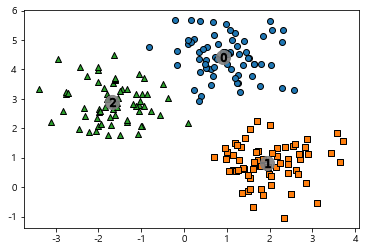

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','x','*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], 
                edgecolor='k', marker=markers[label])
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9)
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', marker='$%d$' % label)
    
plt.show()

In [17]:
clusterDF.groupby('target')['meanshift_label'].value_counts().to_frame()

,,meanshift_label
target,meanshift_label,
0,0,67
1,1,67
2,2,66
